In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import shutil
from sklearn.model_selection import train_test_split
from skimage.io import imread
from sklearn.metrics import confusion_matrix
np.random.seed(42)

Using TensorFlow backend.


In [2]:

source = 'Data/7415_10564_bundle_archive_3/IDC_regular_ps50_idx5/'
patients = os.listdir(source)

len(patients)

279

In [3]:
#os.mkdir('images')

In [21]:
for p in patients:
    file_0 = source + '/' + str(p) + '/0'
    file_1 = source + '/' + str(p) + '/1'
    
    file_list_0 = os.listdir(file_0)
    file_list_1 = os.listdir(file_1)
    
    for file in file_list_0:
        SOURCE_PATH = os.path.join(file_0, file)
        DESTINATION_PATH = os.path.join('images', file)
        shutil.copyfile(SOURCE_PATH, DESTINATION_PATH)
    
    for file in file_list_1:
        SOURCE_PATH = os.path.join(file_1, file)
        DESTINATION_PATH = os.path.join('images', file)
        shutil.copyfile(SOURCE_PATH, DESTINATION_PATH)

In [3]:
total_images = len(os.listdir('images'))
total_images

119952

In [4]:
image_list = os.listdir('images')

data = pd.DataFrame(image_list, columns = ['path'])
data.head()

,path
0,10253_idx5_x1001_y1051_class0.png
1,10253_idx5_x1001_y1101_class0.png
2,10253_idx5_x1001_y1151_class0.png
3,10253_idx5_x1001_y1251_class0.png
4,10253_idx5_x1001_y1351_class0.png


In [5]:
def split_patient_id(x):
    temp = x.split('_')
    return temp[0]

def split_target(x):
    temp = x.split('_')
    ans = temp[4]
    return ans[5]

data['patient_id'] = data['path'].apply(split_patient_id)
data['target'] = data['path'].apply(split_target)

In [6]:

data.head(7)


,path,patient_id,target
0,10253_idx5_x1001_y1051_class0.png,10253,0
1,10253_idx5_x1001_y1101_class0.png,10253,0
2,10253_idx5_x1001_y1151_class0.png,10253,0
3,10253_idx5_x1001_y1251_class0.png,10253,0
4,10253_idx5_x1001_y1351_class0.png,10253,0
5,10253_idx5_x1001_y1501_class0.png,10253,0
6,10253_idx5_x1001_y1551_class0.png,10253,0


In [7]:
data.shape

(119952, 3)

In [8]:
data.target = data.target.astype(np.int)

In [4]:
#hlt_selection = np.random.choice(data[data.target == 0].index.values,size = 50,replace = False)
#cnc_selection = np.random.choice(data[data.target == 1].index.values, size = 50, replace = False)

In [5]:
#fig,ax = plt.subplots(5,5,figsize=(20,10))

#for i in range(5):
#    for j in range(5):
#        idx = cnc_selection[j + 10*i]
#        file = 'images/' + data.loc[idx,"path"]
#        image =imread(file)
#        ax[i,j].imshow(image)
#        ax[i,j].grid(False)

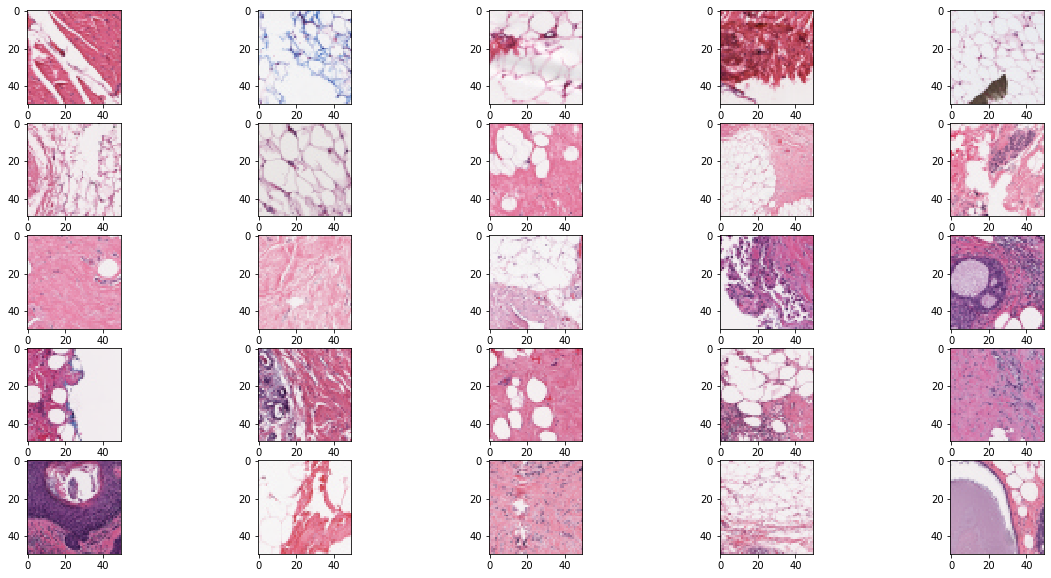

In [12]:
fig,ax = plt.subplots(5,5,figsize=(20,10))

for i in range(5):
    for j in range(5):
        idx = hlt_selection[j + 10*i]
        file = 'images/' + data.loc[idx,"path"]
        image =imread(file)
        ax[i,j].imshow(image)
        ax[i,j].grid(False)

In [9]:

data.target = data.target.astype(np.str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119952 entries, 0 to 119951
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   path        119952 non-null  object
 1   patient_id  119952 non-null  object
 2   target      119952 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [10]:
data['target'].value_counts()

0    119952
Name: target, dtype: int64

In [6]:
#sample_size = 78786
#data_0 = data[data['target'] == '0'].sample(sample_size, random_state=42)
#data_1 = data[data['target'] == '1'].sample(sample_size, random_state=42)

#data = pd.concat([data_0,data_1], axis = 0).reset_index(drop=True)

#data['target'].value_counts()

In [11]:
y = data['target']

data_train, data_test = train_test_split(data, test_size = 0.3, random_state=42, stratify=y)

print(data_train.shape)
print(data_test.shape)

(83966, 3)
(35986, 3)


In [12]:
data_train['target'].value_counts()

0    83966
Name: target, dtype: int64

In [13]:
data_test['target'].value_counts()

0    35986
Name: target, dtype: int64

In [38]:
source_dir = 'data1'
os.mkdir(source_dir)

train_dir = os.path.join(source_dir, 'training')
os.mkdir(train_dir)

val_dir = os.path.join(source_dir, 'testing')
os.mkdir(val_dir)

y_idc = os.path.join(train_dir, 'y_idc')
os.mkdir(y_idc)

n_idc = os.path.join(train_dir, 'n_idc')
os.mkdir(n_idc)

y_idc = os.path.join(val_dir, 'y_idc')
os.mkdir(y_idc)

n_idc = os.path.join(val_dir, 'n_idc')
os.mkdir(n_idc)

In [14]:
os.listdir('data1/training')

['n_idc', 'y_idc']

In [15]:
data.set_index('path', inplace=True)

In [7]:
#training_list = list(data_train['path'])
#validation_list = list(data_test['path'])

#for image in training_list:
#    fname = image
#    target = data.loc[image, 'target']
#    
#    if target == '0':
#        label = 'n_idc'
#    if target == '1':
#        label = 'y_idc'
#        
#    SOURCE = os.path.join('images', fname)
#    DEST = os.path.join(train_dir, label, fname)
#    
#    shutil.move(SOURCE, DEST)
#    
#for image in validation_list:
#    fname = image
#    target = data.loc[image, 'target']
#    
#    if target == '0':
#        label = 'n_idc'
#    if target == '1':
#        label = 'y_idc'
#        
#    SOURCE = os.path.join('images', fname)
#    DEST = os.path.join(val_dir, label, fname)
#    
#    shutil.move(SOURCE, DEST)

In [16]:
print(len(os.listdir('data1/training/y_idc')))
print(len(os.listdir('data1/training/n_idc')))

55150
55150


In [17]:
print(len(os.listdir('data1/testing/y_idc')))
print(len(os.listdir('data1/testing/y_idc')))

23636
23636


In [48]:
train_path = 'data1/training'
validation_path = 'data1/testing'

Batch_size = 256
train_samples = len(data_train)
val_samples = len(data_test)

train_steps = np.ceil(train_samples/Batch_size)
val_steps = np.ceil(val_samples/Batch_size)

35986


In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  )

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(50,50),
                                                    batch_size = Batch_size,
                                                    class_mode ='binary')

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(validation_path,
                                                target_size =(50,50),
                                                batch_size = Batch_size,
                                                class_mode = 'binary')
test_generator=val_datagen.flow_from_directory(validation_path,
                                               target_size =(50,50),
                                               batch_size = 1,
                                               class_mode = 'binary',
                                               shuffle = False)

Found 110300 images belonging to 2 classes.
Found 47272 images belonging to 2 classes.
Found 47272 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32,(3,3),activation ='relu',padding ='same', input_shape=(50,50,3)),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2D(64,(3,3), activation = 'relu',padding='same'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2D(128,(3,3), activation = 'relu',padding='same'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(128, activation ='relu'),
                tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_v2 (Batc (None, 25, 25, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [21]:
model.compile(tf.keras.optimizers.SGD(1e-3),loss = 'binary_crossentropy', metrics = ['acc'])

In [22]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc',
                             verbose=1,
                             save_best_only =True,
                             mode ='max') 
reduce_lr = ReduceLROnPlateau(monitor= 'val_acc',
                              factor = 0.5,
                              patience =3,
                              verbose =1,
                              mode ='max',
                              min_lr = 1e-1)

callback_list=[checkpoint, reduce_lr]

history = model.fit(train_generator,epochs = 25, validation_steps=val_steps, steps_per_epoch = train_steps,
                    validation_data = val_generator,
                    verbose =1, callbacks = callback_list)

Epoch 1/25
327/328 [============================>.] - ETA: 1s - loss: 0.5145 - acc: 0.7601
Epoch 00001: val_acc improved from -inf to 0.63827, saving model to model.h5
328/328 [==============================] - 688s 2s/step - loss: 0.5142 - acc: 0.7603 - val_loss: 0.6020 - val_acc: 0.6383
Epoch 2/25
327/328 [============================>.] - ETA: 1s - loss: 0.4666 - acc: 0.7919
Epoch 00002: val_acc improved from 0.63827 to 0.80582, saving model to model.h5
328/328 [==============================] - 542s 2s/step - loss: 0.4666 - acc: 0.7918 - val_loss: 0.4376 - val_acc: 0.8058
Epoch 3/25
327/328 [============================>.] - ETA: 1s - loss: 0.4499 - acc: 0.8002
Epoch 00003: val_acc improved from 0.80582 to 0.81017, saving model to model.h5
328/328 [==============================] - 497s 2s/step - loss: 0.4499 - acc: 0.8002 - val_loss: 0.4282 - val_acc: 0.8102
Epoch 4/25
327/328 [============================>.] - ETA: 1s - loss: 0.4434 - acc: 0.8030
Epoch 00004: val_acc improved fro

In [62]:
predict = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)

47272/47272 [==============================] - 197s 4ms/step


In [9]:
#predict.shape

In [89]:
df=[]
for p in predict:
    if p >= 0.5:
        df.append(1)
    else:
        df.append(0)


In [63]:
test_labels = test_generator.classes

In [64]:
test_labels.shape

(47272,)

In [91]:
c_m = confusion_matrix(test_labels, df)

In [66]:
test_generator.class_indices

{'n_idc': 0, 'y_idc': 1}

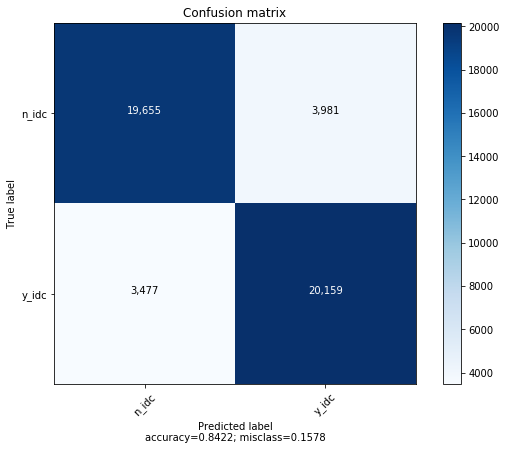

In [92]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
cm_plot_labels = ['n_idc', 'y_idc']

plot_confusion_matrix(c_m, cm_plot_labels)

In [58]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path =os.path.join(MODEL_DIR,str(version))
print(export_path)

C:\Users\AWANKI~1\AppData\Local\Temp\1


In [59]:
if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

In [60]:
import requests
import json
model.save(export_path)

print('\nexport_path = {}'.format(export_path))


export_path = C:\Users\AWANKI~1\AppData\Local\Temp\1


In [54]:
print(filepath)

model.pb


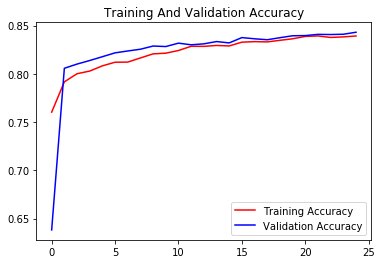

<Figure size 432x288 with 0 Axes>

In [93]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r', label='Training Accuracy')
plt.plot(epochs,val_acc,'b', label='Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()